In [1]:
import numpy as np
import os,sys
import pandas as pd

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_credit=pd.read_csv("raw_data/credit_applications.csv",index_col=0)

In [3]:
df_credit.head()

,client_nr,yearmonth,credit_application,nr_credit_applications
1,1,201401,0,0
2,1,201402,0,0
3,1,201403,0,0
4,1,201404,0,0
5,1,201405,0,0


In [4]:
df_customers=pd.read_csv("raw_data/customers.csv",index_col=0)

In [5]:
df_customers.head()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG
1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0
2,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0
3,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0
4,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0
5,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0


In [6]:
len(df_credit)

29996

In [7]:
len(df_customers)

29996

In [8]:
df_customers['CRG'].isnull().sum()

5537

In [9]:
crg_median=df_customers['CRG'].median()

In [10]:
df_customers['CRG'].fillna(crg_median,inplace=True)

In [11]:
df_customers['CRG'].isnull().sum()

0

In [8]:
full_df = df_customers.merge(df_credit, on=["client_nr","yearmonth"], how="left")

In [9]:
full_df.head()

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications
0,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0,0,0
1,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0,0,0
2,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0,0,0
3,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0,0,0
4,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0,0,0


In [10]:
len(full_df)

29996

In [11]:
merged_df_sorted=full_df.sort_values(by=['client_nr','yearmonth'])

In [22]:
merged_df_sorted[merged_df_sorted['client_nr'] ==18]

,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG,credit_application,nr_credit_applications,nr_credit_applications_diff,increase_in_applications
544,18,201401,377,151,29266166,226,42693872,-27268875,5985640,1.0,1,1,NaN,False
545,18,201402,348,132,39093976,216,36613715,-23773852,5451836,1.0,0,0,-1.0,False
546,18,201403,340,103,36932793,237,28760291,-31003799,5159387,1.0,1,3,3.0,True
547,18,201404,298,80,70944119,218,72347441,-51495305,5164268,1.0,0,0,-3.0,False
548,18,201405,232,70,27722779,162,27097079,-26205139,2383638,1.0,0,0,0.0,False
549,18,201406,384,79,28811102,305,32814990,-26675058,1215194,1.0,0,0,0.0,False
550,18,201407,353,75,34464984,278,35572517,-25815218,908422,1.0,0,0,0.0,False
551,18,201408,360,117,42403374,243,39392457,-28149812,865244,1.0,0,0,0.0,False
552,18,201409,311,85,44274249,226,32676392,-33139669,1363436,1.0,0,0,0.0,False
553,18,201410,345,110,39167778,235,39000645,-33795218,2325151,1.0,1,1,1.0,True


In [12]:
label_dist=merged_df_sorted['credit_application'].mean()

In [13]:
label_dist

0.06750900120016003

In [14]:
client_label_dist=merged_df_sorted.groupby('client_nr')['credit_application'].mean().reset_index()

In [15]:
client_label_dist

,client_nr,credit_application
0,1,0.00000
1,2,0.00000
2,3,0.12500
3,4,0.03125
4,5,0.00000
...,...,...
987,996,0.00000
988,997,0.00000
989,998,0.00000
990,999,0.00000


In [30]:
client_label_dist['stratum']=(client_label_dist['credit_application']>label_dist).astype(int)

In [31]:
client_label_dist

,client_nr,credit_application,stratum
0,1,0.00000,0
1,2,0.00000,0
2,3,0.12500,1
3,4,0.03125,0
4,5,0.00000,0
...,...,...,...
987,996,0.00000,0
988,997,0.00000,0
989,998,0.00000,0
990,999,0.00000,0


In [32]:
client_train,client_test=train_test_split(client_label_dist['client_nr'],test_size=0.2,stratify=client_label_dist['stratum'],random_state=42)

NameError: name 'train_test_split' is not defined

In [33]:
train_df=merged_df_sorted[merged_df_sorted['client_nr'].isin(client_train)]
test_df=merged_df_sorted[merged_df_sorted['client_nr'].isin(client_test)]

NameError: name 'client_train' is not defined

In [ ]:
set(test_df['client_nr'])

In [ ]:
test_df['credit_application'].mean()

- total_nr_trx: Total number of transactions
- nr_debit_trx: Number of debit transactions
- volume_debit_trx: Volume of debit transactions
- nr_credit_trx: Number of credit transactions
- volume_credit_trx: Volume of credit transactions
- min_balance: Minimum balance
- max_balance: Maximum balance
- CRG: Credit Risk Grade (assuming this is what CRG stands for)

In [ ]:
full_df.info()

In [ ]:
full_df.describe()

In [ ]:
full_df.isnull().sum()

In [ ]:
full_df['CRG'].isnull().sum(), 

In [ ]:
## Feature Engineering

In [ ]:
full_df['trx_volume_ratio']= (full_df['volume_debit_trx'])/(full_df['volume_credit_trx']+1)

In [34]:
# Visualize the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
numerical_columns = full_df.select_dtypes(include=['int', 'float']).columns

In [36]:
full_df.columns

Index(['client_nr', 'yearmonth', 'total_nr_trx', 'nr_debit_trx',
       'volume_debit_trx', 'nr_credit_trx', 'volume_credit_trx', 'min_balance',
       'max_balance', 'CRG', 'credit_application', 'nr_credit_applications'],
      dtype='object')

<Axes: xlabel='min_balance', ylabel='Count'>

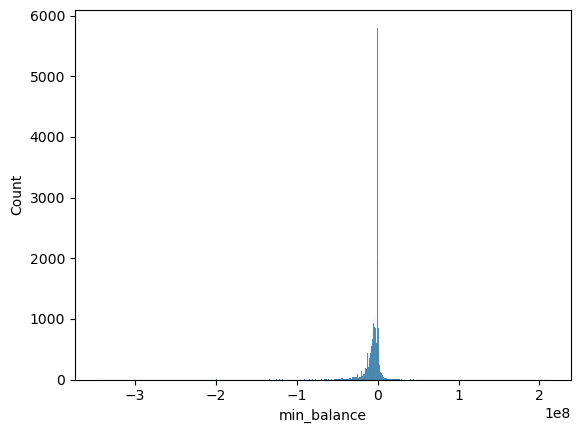

In [40]:
sns.histplot(full_df['min_balance'])

In [ ]:
for column in numerical_columns:
    plt.figure()
    sns.histplot(full_df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [ ]:
#! pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
X_train= train_df.drop(['client_nr','yearmonth','credit_application','nr_credit_applications'],axis=1)
y_train= train_df['credit_application']

In [ ]:
X_test= test_df.drop(['client_nr','yearmonth','credit_application','nr_credit_applications'],axis=1)
y_test= test_df['credit_application']

In [ ]:
(sum(y_train==0)/len(y_train))

In [ ]:
(sum(y_test==1)/len(y_test))

In [ ]:
model= xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred_proba =model.predict_proba(X_test)[:,1]

In [ ]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

In [ ]:
roc_auc =roc_auc_score(y_test,y_pred_proba)

In [ ]:
roc_auc

In [ ]:
report =classification_report(y_test,y_pred,output_dict=True)

In [ ]:
report_df= pd.DataFrame(report).transpose()

In [ ]:
report_df

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
plt.figure()
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=True,yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()